# <center> <h1> Modélisation linéaire </h1> </center>

<img src="../images/example.png" width="200">

## Le problème

Les modèles linéaires sont intéressants en raison de leur interprétabilité. Ils donnent une approximation de phénomènes que l'on tente de comprendre.

Lorsque l'on cherche à comprendre des phénomènes et déterminer des mécanismes explicatifs d'une variable de sortie, il peut être utile de réaliser une modélisation, notamment linéaire.

Pour chaque individu i (un individu correspond à une ligne) d'une base de données on a des informations $x^i_1, x^i_2,..., x^i_n$ et une valeur réelle $y^i$ que l'on cherche à approximer. 

On cherche un modèle permettant d'approximer une variable (output) $y^i$, grâce à les variables explicatives (features/input) $x^i_1, x^i_2,..., x^i_n$ par l'équation suivante :
$$\hat{y}^i = \alpha_1x^i_1 + \alpha_2x^i_2 + ... + \alpha_nx^i_n$$

Avec : 
- i : un individu i d'une base de données
- $\hat{y}^i$ l'approximation de $\hat{y}$
- $\alpha_1, \alpha_2,..., \alpha_n$ des coefficients réels

## I. Les moindres carrés ordinaires

Avec les moindres carrés on tente de réaliser la meilleure approximation en choisissant des coefficient $\alpha_1, \alpha_2,..., \alpha_n$ qui vont minismiser l'erreur quadratique moyenne : 
$$\frac{1}{n}\sum_i(y^i-\hat{y}^i)^2$$

In [44]:
get_ipython().magic(u'matplotlib inline')
%run -i ../utils/credentials.py
%run -i ../utils/imports.py
%run -i ../utils/plots.py
%run -i ../utils/stats.py

import numpy as np

In [53]:
data_path = "../data/PUBG_train_sample.csv"
data_PUBG = pd.read_csv(data_path)
data_PUBG = data_PUBG.sample(frac=0.01, replace=False, random_state=1234)
data_PUBG_not_zero = data_PUBG[(data_PUBG["winPoints"]!=0)&(data_PUBG["killPoints"]!=0)]

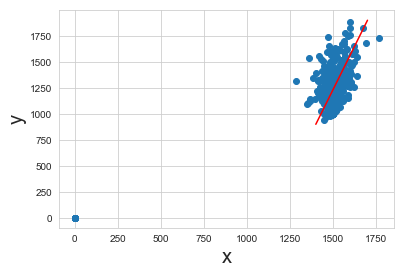

In [54]:
plt.scatter(data_PUBG["winPoints"], data_PUBG["killPoints"])
plt.xlabel("x", fontsize = 20)
plt.ylabel("y", fontsize = 20)
plt.plot((1400,1700),(900,1900), c="r")

La solution des moindres carré existe et elle est analytique. Sous certaines conditions elle a également la propriété d'être sans biais c'est à dire qu'en moyenne on l'écart entre $y$ et $\hat{y}$ est nulle.
Ces conditions sont les suivantes : 


TODO : donner les hypothèses des MCO.

## Intérprétation du modèle

__Les coefficient__
Chaque coefficient $\alpha_i$ donne l'effet de la variable $x_i$ sur l'output. Si $x_1$ augmente de 1 alors la variable $y$ augmente de $\alpha_i$.

__La qualité du modèle__
Pour savoir si un modèle linéaire est bon, plusieurs points peuvent être vérifiés :
- les hypothèses sont-elles respectées ?
- l'ajustement est-il correct ?

Pour répondre à la deuxième question on peut calculer la part de la variance (en d'autres termes un indicateur de la variation) de y

##### Imports

In [55]:
x = data_PUBG["winPoints"]
y = data_PUBG["killPoints"]
slope, intercept, r_value, p_value, std_err = scs.linregress(x, y)

print(intercept)
print(slope)

-0.69955334723943
0.825000858701489


In [56]:
import statsmodels.api as sm
x = data_PUBG["winPoints"]
x = sm.add_constant(x)
y = data_PUBG["killPoints"]

MCO_model = sm.GLM(y, x)
MCO_results = MCO_model.fit()

In [57]:
MCO_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             killPoints   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      998
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          14006.
Method:                          IRLS   Log-Likelihood:                -6191.6
Date:                Mon, 04 Nov 2019   Deviance:                   1.3978e+07
Time:                        09:38:14   Pearson chi2:                 1.40e+07
No. Iterations:                     3   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6996      4.946     -0.141      0.888     -10.394       8.995
winPoints      0.8250      0.005    164.375      0.000       0.815       0.835
==============================================================================
"""

In [58]:
MCO_results.params

const       -0.699553
winPoints    0.825001
dtype: float64

In [59]:
MCO_results.pvalues

const        0.887532
winPoints    0.000000
dtype: float64

ValueError: shapes (1000,2) and (1000,) not aligned: 2 (dim 1) != 1000 (dim 0)

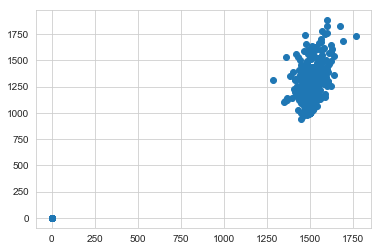

In [83]:
plt.scatter(data_PUBG["winPoints"], data_PUBG["killPoints"])

# With all the data
x = data_PUBG["winPoints"]
x = sm.add_constant(x)
y = data_PUBG["killPoints"]
MCO_model = sm.GLM(y, x)
MCO_results = MCO_model.fit()

# With only non zero value
x_not_zero = data_PUBG_not_zero["winPoints"]
x_not_zero = sm.add_constant(x_not_zero)
y_not_zero = data_PUBG_not_zero["killPoints"]
MCO_model_not_zero = sm.GLM(y_not_zero, x_not_zero)
MCO_results_not_zero = MCO_model_not_zero.fit()


x_plot = np.linspace(0,1800)
y_plot = MCO_results.params.const + MCO_results.params.winPoints*x_plot
plt.plot(x_plot, y_plot, c = "r")

x_plot_not_zero = np.linspace(0,1800)
y_plot_not_zero = MCO_results_not_zero.params.const + MCO_results_not_zero.params.winPoints*x_plot
plt.plot(x_plot_not_zero, y_plot_not_zero, c = "g")

In [67]:
len(data_PUBG) - len(data_PUBG_not_zero)

572

In [68]:
len(data_PUBG)

1000

In [65]:
MCO_results_not_zero.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             killPoints   No. Observations:                  428
Model:                            GLM   Df Residuals:                      426
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          32001.
Method:                          IRLS   Log-Likelihood:                -2826.2
Date:                Mon, 04 Nov 2019   Deviance:                   1.3633e+07
Time:                        09:42:38   Pearson chi2:                 1.36e+07
No. Iterations:                     3   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -863.9953    262.757     -3.288      0.001   -1378.990    -349.001
winPoints      1.3978      0.174      8.014      0.000       1.056       1.740
==============================================================================
"""

In [70]:
# With only non zero value
x_not_zero = data_PUBG_not_zero["winPoints"]
x_not_zero = sm.add_constant(x_not_zero)
y_not_zero = data_PUBG_not_zero["killPoints"]
MCO_model_not_zero = sm.GLM(y_not_zero, x_not_zero)
MCO_results_not_zero = MCO_model_not_zero.fit()

# With only non zero value
x_not_zero_two_X = data_PUBG_not_zero[["winPoints","winPoints"]]
x_not_zero_two_X = sm.add_constant(x_not_zero_two_X)
MCO_model_not_zero_two_X = sm.GLM(y_not_zero, x_not_zero_two_X)
MCO_results_not_zero_two_X = MCO_model_not_zero_two_X.fit()

In [72]:
MCO_results_not_zero_two_X.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             killPoints   No. Observations:                  428
Model:                            GLM   Df Residuals:                      426
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          32001.
Method:                          IRLS   Log-Likelihood:                -2826.2
Date:                Mon, 04 Nov 2019   Deviance:                   1.3633e+07
Time:                        09:48:04   Pearson chi2:                 1.36e+07
No. Iterations:                     3   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -863.9953    262.757     -3.288      0.001   -1378.990    -349.001
winPoints      0.6989      0.087      8.014      0.000       0.528       0.870
winPoints      0.6989      0.087      8.014      0.000       0.528       0.870
==============================================================================
"""

In [73]:
 MCO_results_not_zero.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             killPoints   No. Observations:                  428
Model:                            GLM   Df Residuals:                      426
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          32001.
Method:                          IRLS   Log-Likelihood:                -2826.2
Date:                Mon, 04 Nov 2019   Deviance:                   1.3633e+07
Time:                        09:48:21   Pearson chi2:                 1.36e+07
No. Iterations:                     3   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -863.9953    262.757     -3.288      0.001   -1378.990    -349.001
winPoints      1.3978      0.174      8.014      0.000       1.056       1.740
==============================================================================
"""

Calcul du $R^2$ : 
$$R^2 = \frac{SSR}{SST}$$ 
- $SSR$ (regression sum of squares) $= \sum_i(\hat{y_i} - \bar{y})^2$
- $SST$ (total sum of squares) $= \sum_i(y_i - \bar{y})^2$

In [77]:
def compute_R_square(y,y_hat):
    SSR = np.sum(y_hat - np.mean(y_hat))
    SST = np.sum(y - np.mean(y_hat))
    return SSR/SST

In [94]:
y + MCO_model.mu

13504    2275.851730
72599      -0.699553
42217    2582.751809
97650      -0.699553
99120    2543.301752
13165    2421.076689
56244      -0.699553
72729      -0.699553
10979    2236.801735
11794      -0.699553
30261      -0.699553
27441      -0.699553
82623    2723.101772
51042      -0.699553
92194      -0.699553
91810      -0.699553
13266    2355.551760
48317    2592.201762
64118      -0.699553
31116    2288.351747
12024      -0.699553
6855       -0.699553
25028      -0.699553
35601      -0.699553
24579      -0.699553
37994    2752.951788
87519      -0.699553
26750    2478.926739
97992    2305.776754
60419      -0.699553
            ...     
11577      -0.699553
24257      -0.699553
99555    2273.451736
8208     2882.451771
20983      -0.699553
23786      -0.699553
46962    2377.076689
2987     2236.801735
63702    2236.801735
82368    2631.201693
25343    2213.651716
55325      -0.699553
91178    3068.076792
11214      -0.699553
33242      -0.699553
94964    3055.101807
74543      -0

In [92]:
y

13504    1044
72599       0
42217    1275
97650       0
99120    1290
13165    1228
56244       0
72729       0
10979    1000
11794       0
30261       0
27441       0
82623    1450
51042       0
92194       0
91810       0
13266    1094
48317    1329
64118       0
31116    1040
12024       0
6855        0
25028       0
35601       0
24579       0
37994    1465
87519       0
26750    1238
97992    1050
60419       0
         ... 
11577       0
24257       0
99555    1035
8208     1611
20983       0
23786       0
46962    1184
2987     1000
63702    1000
82368    1434
25343     995
55325       0
91178    1776
11214       0
33242       0
94964    1749
74543       0
78532       0
36052    1026
29520       0
10201    1165
29400       0
67134       0
50477    1115
73142       0
63879    1099
94306       0
8879     1000
30347    1142
15196    1257
Name: killPoints, Length: 1000, dtype: int64

In [ ]:
compute_R_square(y,)

<center> <h1>Take away</h1> </center>

<img src="../images/coffee.png" width="200">


__Expresso__ : 

* point 1
* point 2

__Sugar Story__ :

* point 1
* point 2

# Get more on my github <img src="../images/github.png" width="100">
https://github.com/JJublanc/statistics_tools